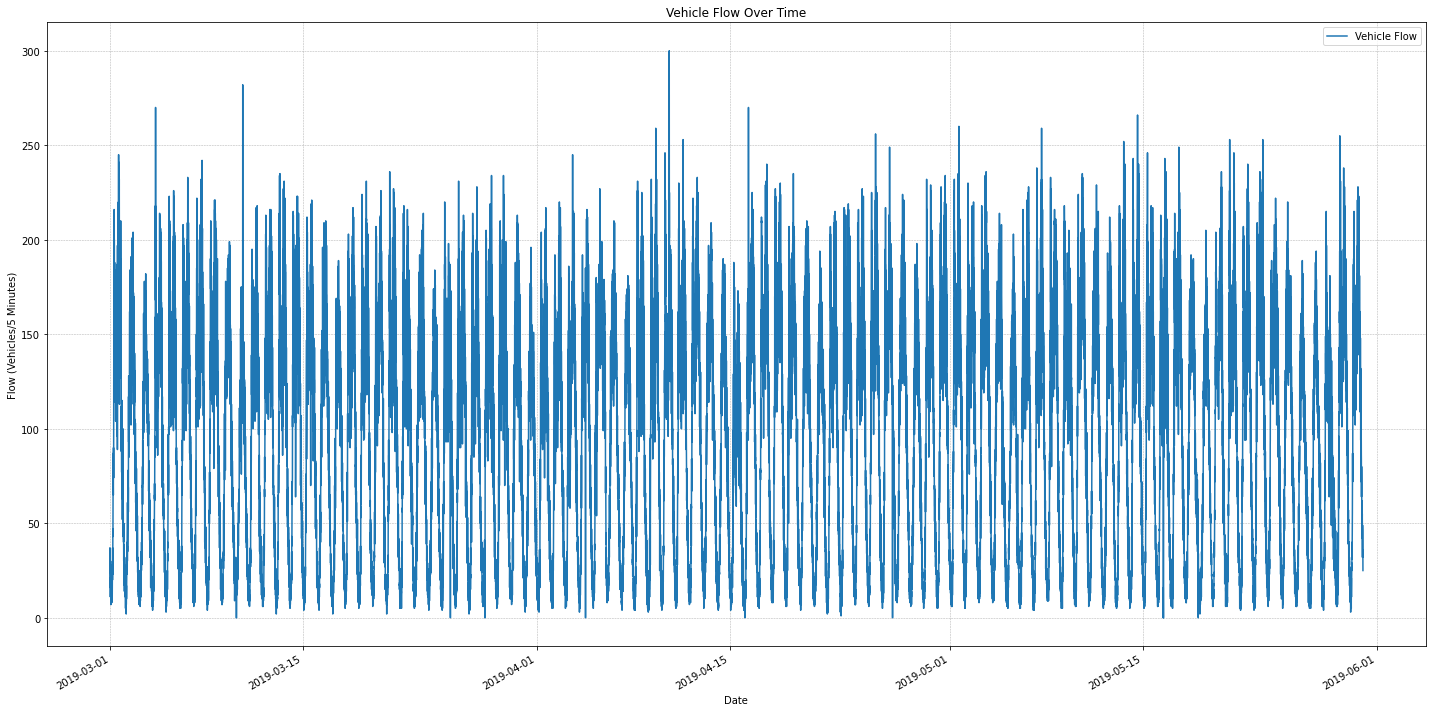

       Flow (Veh/5 Minutes)
count          26192.000000
mean              98.653291
std               61.603537
min                0.000000
25%               36.000000
50%              107.000000
75%              150.000000
max              300.000000


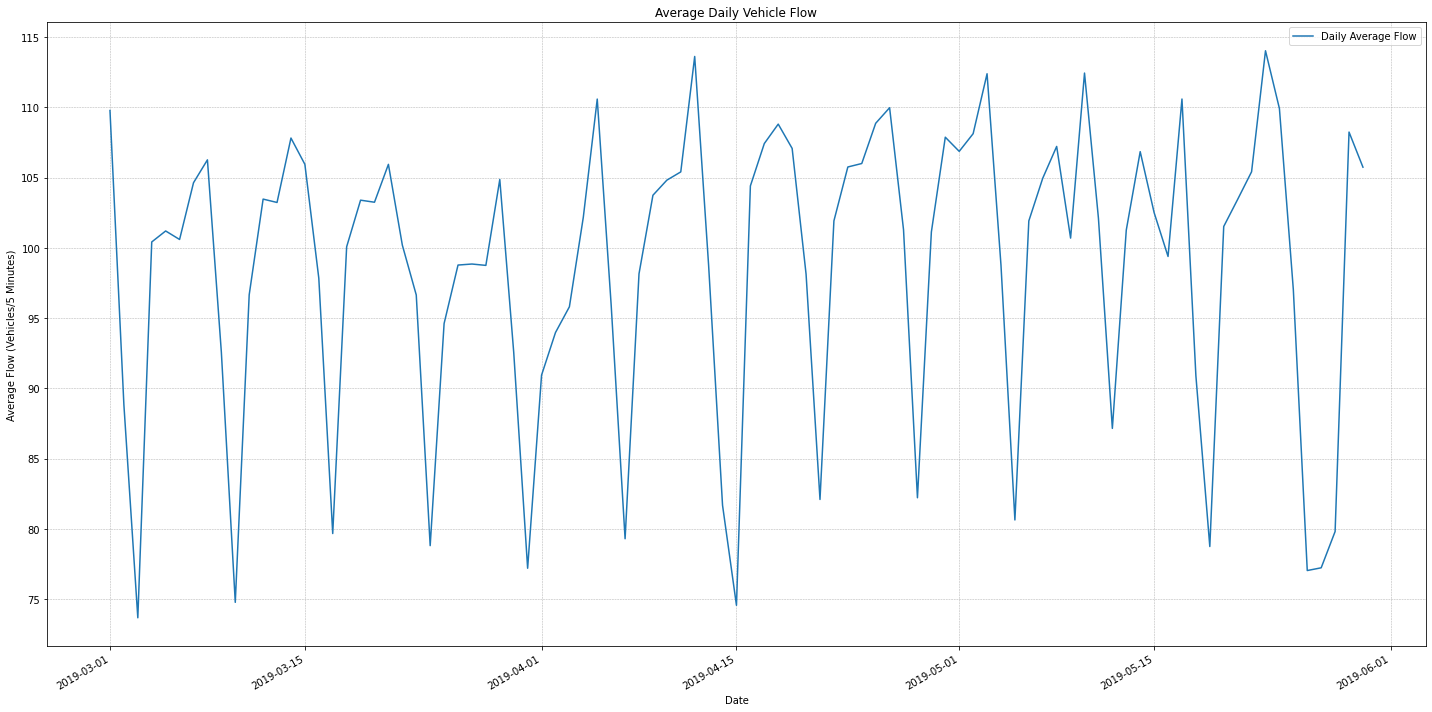

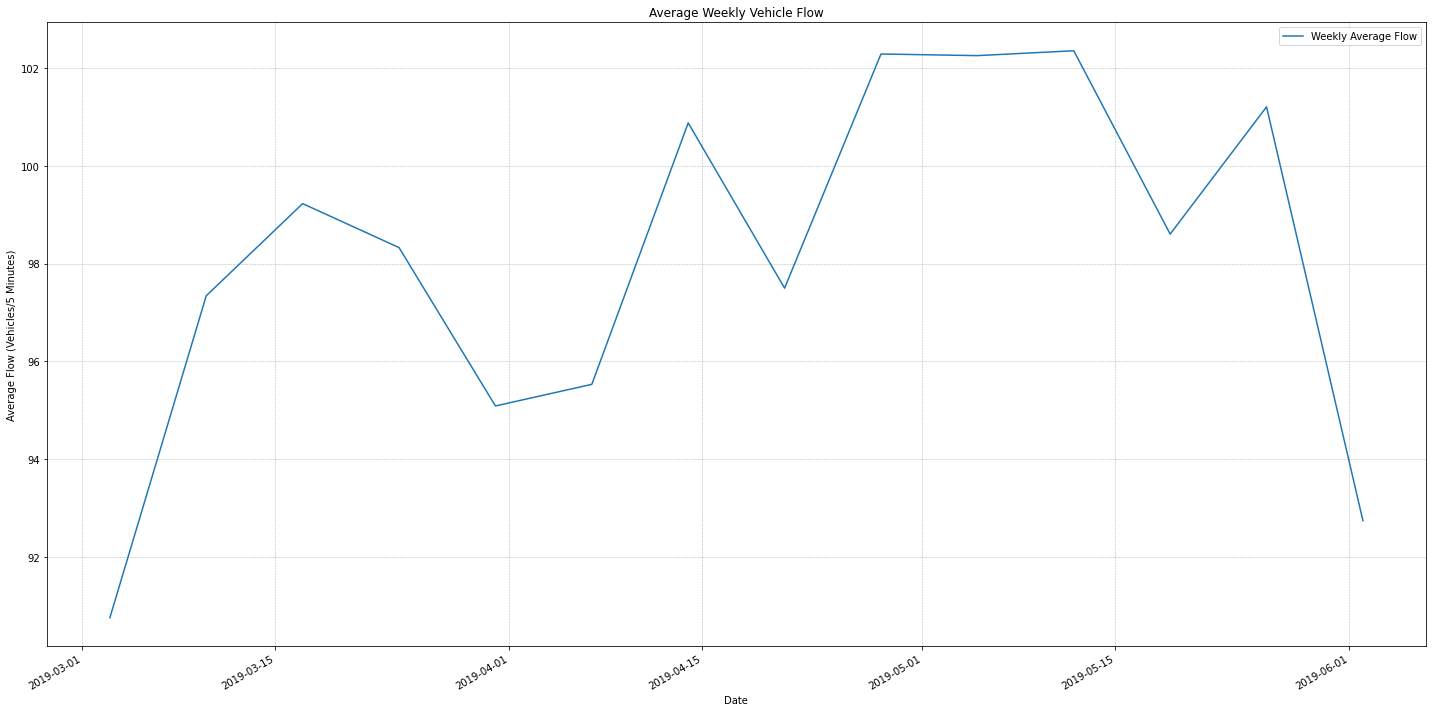

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

def load_data(folder_path):
    all_data = []
    for file in sorted(os.listdir(folder_path)):
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            if '5 Minutes' in df.columns and 'Flow (Veh/5 Minutes)' in df.columns:
                # Convert timestamp column to datetime
                df['5 Minutes'] = pd.to_datetime(df['5 Minutes'], errors='coerce')
                # Set timestamp as the index
                df = df.set_index('5 Minutes')
                # Append only the required column
                all_data.append(df[['Flow (Veh/5 Minutes)']])
    
    # Concatenate all dataframes
    combined_data = pd.concat(all_data)
    
    # Sort by the timestamp index
    combined_data = combined_data.sort_index()
    
    # Drop any rows with missing values
    combined_data = combined_data.dropna()
    
    return combined_data

# Load the data
folder_path = 'Data/414025'  # Replace with your folder path
data = load_data(folder_path)

# Plot the data
plt.figure(figsize=(20, 10))
plt.plot(data.index, data['Flow (Veh/5 Minutes)'], label='Vehicle Flow')
plt.title('Vehicle Flow Over Time')
plt.xlabel('Date')
plt.ylabel('Flow (Vehicles/5 Minutes)')

# Format x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate date labels

# Add grid and legend for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print some basic statistics
print(data.describe())

# Plot daily averages
daily_avg = data.resample('D').mean()
plt.figure(figsize=(20, 10))
plt.plot(daily_avg.index, daily_avg['Flow (Veh/5 Minutes)'], label='Daily Average Flow')
plt.title('Average Daily Vehicle Flow')
plt.xlabel('Date')
plt.ylabel('Average Flow (Vehicles/5 Minutes)')

# Format x-axis for daily plot
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Plot weekly averages
weekly_avg = data.resample('W').mean()
plt.figure(figsize=(20, 10))
plt.plot(weekly_avg.index, weekly_avg['Flow (Veh/5 Minutes)'], label='Weekly Average Flow')
plt.title('Average Weekly Vehicle Flow')
plt.xlabel('Date')
plt.ylabel('Average Flow (Vehicles/5 Minutes)')

# Format x-axis for weekly plot
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
